In [27]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input, Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.losses import mse, binary_crossentropy
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import pandas as pd

from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Model, load_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing.data import StandardScaler

In [2]:
df = pd.read_csv("datasets/creditcardfraud/creditcard.csv", sep=",", index_col=None)
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,1.642058,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [4]:
anomalies = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

anomalies.shape, normal.shape


((492, 31), (284315, 31))

In [7]:

for f in range(0, 20):
    normal = normal.iloc[np.random.permutation(len(normal))]
    
data_set = normal[:50000]
# data_set = pd.concat([normal[:50000], anomalies])

x_train, x_test, y_train, y_test = train_test_split(data_set.drop(labels=['Time', 'Class'], axis=1), data_set["Class"], test_size = 0.4, random_state = 42)


x_train.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
274429,-1.657920,1.652671,1.046911,0.902322,-0.334951,0.617618,-0.161593,1.169890,-0.411618,-0.491390,...,0.100949,-0.475041,-1.234818,-0.125115,-0.527226,0.512988,-0.765891,0.224451,0.048594,-0.276626
44170,1.130716,-0.178140,1.146394,1.164118,-0.875509,0.276210,-0.748999,0.324903,0.834770,0.002381,...,-0.187916,-0.045425,-0.017891,-0.043995,-0.031573,0.387649,-0.401863,0.060416,0.022266,-0.313289
236935,1.973719,-0.463290,-0.552049,0.196347,-0.271269,0.385418,-0.754001,0.195585,1.197448,-0.009317,...,-0.152606,0.212756,0.808206,0.084777,0.309691,-0.041762,-0.239752,0.033681,-0.043487,-0.313289
169620,-3.931691,-9.804967,-7.234427,2.691914,0.311235,3.991431,4.599963,-0.342240,-0.805153,-1.036978,...,6.114932,2.188756,-0.690229,-2.930926,0.911722,-0.226932,-0.506673,-0.623426,0.457182,12.116801
62091,1.136262,0.344226,0.746501,1.178445,-0.422411,-0.714022,0.092643,-0.103808,-0.084589,-0.085402,...,-0.139146,-0.156985,-0.412430,0.185253,0.572446,0.242213,-0.636289,0.044377,0.034063,-0.313289
244943,-1.173946,0.609209,0.741983,-1.809244,0.180076,-0.010626,0.312183,0.399817,-1.805899,-0.311466,...,-0.596603,-0.114611,0.072045,-0.516300,0.773349,0.970481,0.701896,-0.285448,-0.050652,-0.307251
109772,-1.410179,1.814297,-0.098712,0.732785,0.261003,-0.567619,-0.041579,0.873109,-1.487304,-0.979149,...,0.081870,0.027427,-0.039400,-0.302219,-0.051984,0.438048,0.569537,-0.107624,-0.134427,-0.350191
64040,1.379624,-0.530499,0.051031,-0.744236,-0.670970,-0.534966,-0.357772,-0.241030,-0.911289,0.632653,...,-0.314156,-0.475521,-0.927728,-0.033580,-0.414632,0.270472,0.994514,-0.057658,0.009814,-0.172876
60894,-1.833002,-0.687548,0.887174,-3.897672,-0.197554,-0.977650,-0.398718,0.476628,-0.211763,-0.967600,...,-0.646945,-0.171236,0.133194,0.364828,-0.504068,0.506091,-0.158307,0.173452,-0.001846,-0.292578
52864,-1.681588,0.859126,-0.011338,1.215061,-2.821094,2.905630,3.435756,-3.921831,-0.125177,0.661478,...,-1.743910,1.779017,-0.568015,-4.064152,0.320185,-0.802003,-0.259405,0.667533,-0.923574,4.225179


In [8]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))


Shapes:
x_train:(30000, 29)
y_train:(30000,)

x_test:(20000, 29)
y_test:(20000,)



In [9]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1])
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1])
input_shape = (x_train.shape[1])

# y_train = keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)


In [10]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(30000, 29)
y_train:(30000,)

x_test:(20000, 29)
y_test:(20000,)

input_shape:29



In [11]:
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [70]:
logfilename = "variationalautoencoder"


original_dim  = x_train.shape[1]

print(original_dim)

input_shape = (original_dim,)
intermediate_dim1 = 16
intermediate_dim2 = 8
batch_size = 32
latent_dim = 4
epochs = 20


# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim1, activation='relu')(inputs)
x = Dense(intermediate_dim2, activation='relu')(x)

z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')

x = Dense(intermediate_dim2, activation='relu')(latent_inputs)
x = Dense(intermediate_dim1, activation='relu')(x)
outputs = Dense(original_dim, activation='linear')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')


# VAE loss = mse_loss or xent_loss + kl_loss
reconstruction_loss = mse(inputs, outputs)

reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.005
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

29
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
encoder_input (InputLayer)       (None, 29)            0                                            
____________________________________________________________________________________________________
dense_26 (Dense)                 (None, 16)            480         encoder_input[0][0]              
____________________________________________________________________________________________________
dense_27 (Dense)                 (None, 8)             136         dense_26[0][0]                   
____________________________________________________________________________________________________
z_mean (Dense)                   (None, 4)             36          dense_27[0][0]                   
________________________________________________________________________________________

In [71]:

vae.compile(optimizer=optimizers.Adam(lr=0.009), 
                    loss='mean_squared_error',
                    metrics=['accuracy'])
vae.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 29)                0         
_________________________________________________________________
encoder (Model)              [(None, 4), (None, 4), (N 688       
_________________________________________________________________
decoder (Model)              (None, 29)                677       
Total params: 1,365
Trainable params: 1,365
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = vae.fit(x_train, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    callbacks=[TensorBoard(log_dir='../logs/{0}'.format(logfilename))])

Train on 30000 samples, validate on 20000 samples
Epoch 1/20
30000/30000 [==============================] - 11s - loss: 19.8228 - acc: 0.4439 - val_loss: 15.7939 - val_acc: 0.5520
Epoch 2/20
30000/30000 [==============================] - 11s - loss: 16.4411 - acc: 0.5246 - val_loss: 15.0547 - val_acc: 0.5666
Epoch 3/20
30000/30000 [==============================] - 12s - loss: 16.5864 - acc: 0.5325 - val_loss: 17.8040 - val_acc: 0.5381
Epoch 4/20
30000/30000 [==============================] - 12s - loss: 17.1114 - acc: 0.5232 - val_loss: 15.4634 - val_acc: 0.5696
Epoch 5/20
30000/30000 [==============================] - 11s - loss: 14.2454 - acc: 0.5697 - val_loss: 14.4276 - val_acc: 0.5673
Epoch 6/20
30000/30000 [==============================] - 10s - loss: 15.3333 - acc: 0.5519 - val_loss: 15.1136 - val_acc: 0.5819
Epoch 7/20
30000/30000 [==============================] - 11s - loss: 14.8047 - acc: 0.5605 - val_loss: 15.0361 - val_acc: 0.5800
Epoch 8/20
30000/30000 [================

In [13]:
# y_test

In [73]:
## EVAL ON X_TEST

predictions = vae.predict(x_test)


pred_mse = np.mean(np.power(x_test.reshape(x_test.shape[0], x_test.shape[1]) - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': pred_mse,
                        'true_class': y_test})

error_df.describe()

,reconstruction_error,true_class
count,20000.000000,20000.0
mean,0.503664,0.0
std,2.085701,0.0
min,0.053906,0.0
25%,0.193739,0.0
50%,0.292189,0.0
75%,0.504037,0.0
max,199.098160,0.0


In [74]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
# _ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

No handles with labels found to put in legend.


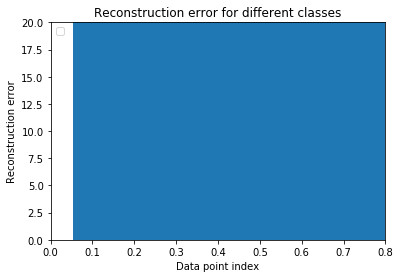

In [75]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

import matplotlib.pyplot as plt

threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

errors = []
for name, group in groups:
    errors.append(group.reconstruction_error)
errors = np.array(errors)
    

ax.legend()
plt.hist(np.array(errors)[0][:10000], bins=400)
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.axis([0,0.8,0,20])
plt.show();
# threshold = 0.06

In [76]:
# fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
# roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
# plt.legend(loc='lower right')
# plt.plot([0,1],[0,1],'r--')
# plt.xlim([-0.001, 1])
# plt.ylim([0, 1.001])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show();

In [77]:
# error_df.quantile(0.25)

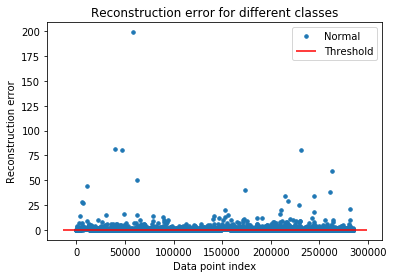

In [78]:

threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
    
ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

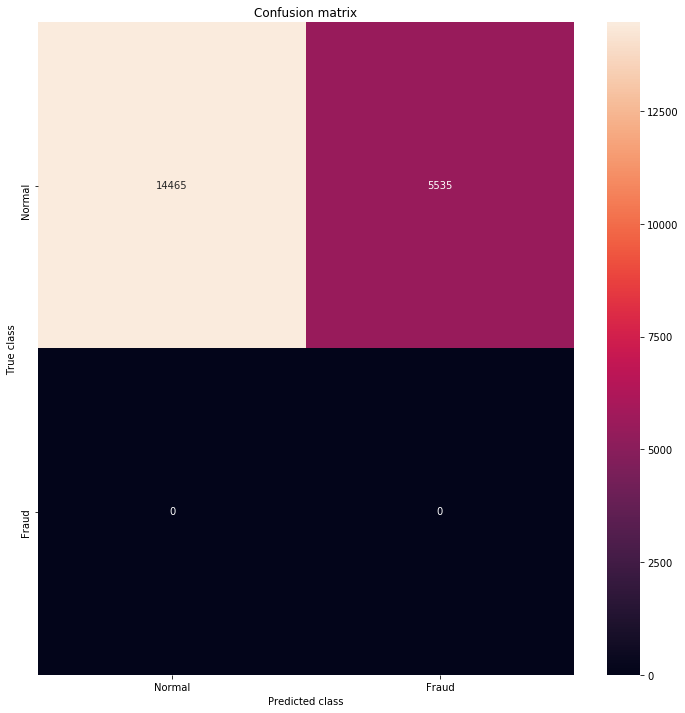

In [79]:


LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# score = TCN.evaluate(x_test, x_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [40]:
# counter = []

# for f in range(0, len(error_df)):
#     if error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
#         counter.append(1)
#     else:
#         counter.append(0)

In [41]:
# from sklearn.metrics import roc_auc_score

# auc = roc_auc_score( counter, y_test)
# print("AUC: {:.2%}".format (auc))

In [80]:
### EVAL ON ANOMALIES
anom_class = anomalies['Class']
anom = np.array(anomalies.drop(labels=['Time','Class'], axis=1))


anom_predictions = vae.predict(anom)

anom_mse = np.mean(np.power(anom.reshape(anom.shape[0], anom.shape[1]) - anom_predictions, 2), axis=1)
anom_error_df = pd.DataFrame({'reconstruction_error': anom_mse,
                        'true_class': anom_class})

anom_error_df.describe()

,reconstruction_error,true_class
count,492.000000,492.0
mean,20.381908,1.0
std,25.139270,0.0
min,0.142797,1.0
25%,3.061114,1.0
50%,8.036474,1.0
75%,25.663149,1.0
max,99.101128,1.0


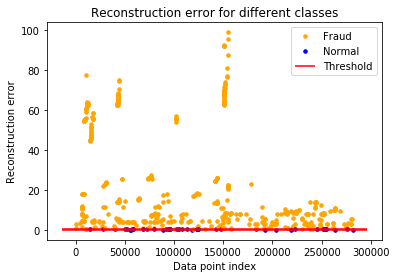

In [81]:
import matplotlib.pyplot as plt
# threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
# threshold = threshold.reconstruction_error
# threshold = threshold * 10
groups = anom_error_df.groupby('true_class')
fig, ax = plt.subplots()


for f in range(0, len(anom_error_df)):
    ax.plot(anom_error_df.index[f], anom_error_df.reconstruction_error.values[f], marker='o', ms=3.5, linestyle='',
           label="Fraud" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "Normal",
           color="orange" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "b")
    

    
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels)


plt.show();

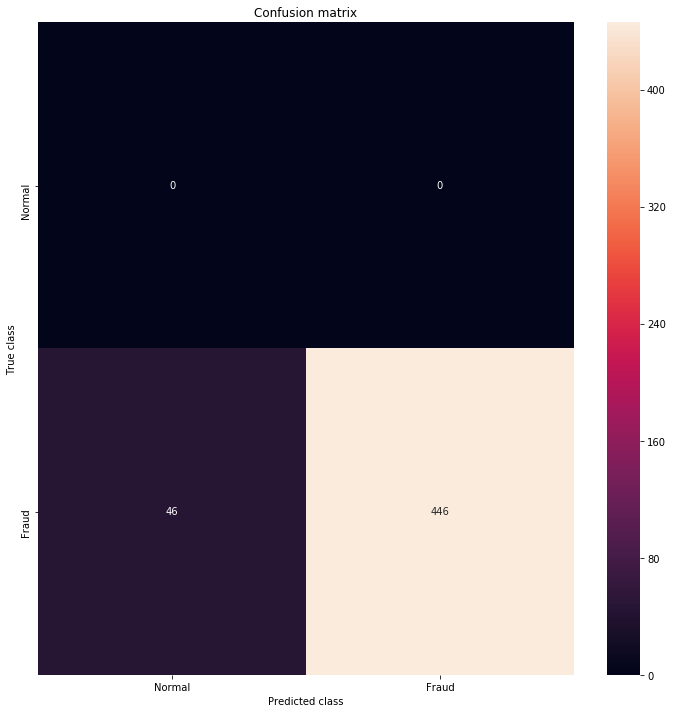

In [82]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in anom_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(anom_error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# score = TCN.evaluate(x_test, x_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [83]:
counter = 0

for f in range(0, len(anom_error_df)):
    if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter = counter + 1
    
    
print("Accuracy: {}".format(counter / len(anom_error_df)))

Accuracy: 0.9065040650406504


In [65]:

# groups = anom_error_df.groupby('true_class')
# fig, ax = plt.subplots()



# for name, group in groups:
#     ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
#             label= "Fraud" if ((group.reconstruction_error.values[name] > threshold.reconstruction_error)) else "Normal")
# ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
# ax.legend()
# plt.title("Reconstruction error for different classes")
# plt.ylabel("Reconstruction error")
# plt.xlabel("Data point index")
# plt.show();

### TEST ON DF

points = np.array(df.drop(labels=['Time', 'Class'], axis=1))
truths = df['Class']

preds = vae.predict(points)

pred_mse = np.mean(np.power(points - preds, 2), axis=1)
pred_error_df = pd.DataFrame({'reconstruction_error': pred_mse,
                        'true_class': truths})

pred_error_df.describe()


,reconstruction_error,true_class
count,284807.000000,284807.000000
mean,0.417631,0.001727
std,1.717667,0.041527
min,0.019165,0.000000
25%,0.147496,0.000000
50%,0.244861,0.000000
75%,0.426066,0.000000
max,293.330537,1.000000


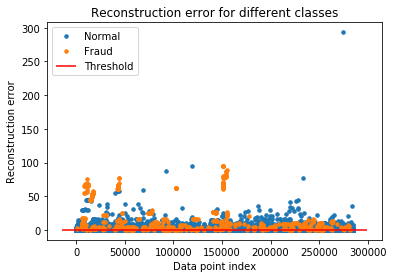

In [66]:
threshold = 1.5 * (pred_error_df.quantile(0.75) - pred_error_df.quantile(0.25))
groups = pred_error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

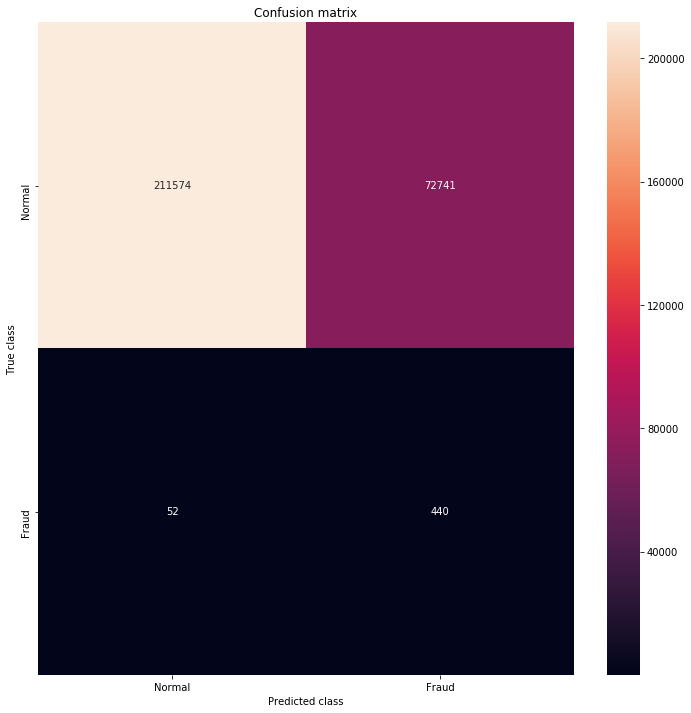

In [67]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in pred_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(pred_error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [68]:
counter = []

for f in range(0, len(pred_error_df)):
    if pred_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)

In [69]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(counter, truths)
print("AUC: {:.2%}".format (auc))

AUC: 50.29%


In [93]:
# from sklearn.metrics import roc_auc_score

# auc = roc_auc_score( counter, truths)
# print("AUC: {:.2%}".format (auc))

AUC: 50.29%
